In [1]:
# plot cluster efficiency uncertainty vs. Nrechits scan
# this plot is ultimately not used in the AN

import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os

from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)




Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [14]:
nRechits = [30, 40, 50, 60, 70, 130, 250]
cluster_unc = np.array([1.00, 1.42, 0.89, 4.75, 6.16, 15.06, 10.47])
cluster_stat_unc = np.array([1.23, 1.73, 2.29, 2.84, 3.37, 6.34, 16.24])

id_unc = np.array([0.07, 1.12, 0.75, 1.61, 3.46, 8.67, 7.54])
id_stat_unc = np.array([0.77, 1.00, 1.28, 1.67, 2.00, 3.83, 10.61])
total_unc = (np.array(cluster_unc)**2+np.array(id_unc)**2)**0.5
total_stat_unc = np.sqrt(((cluster_unc*cluster_stat_unc)**2+(id_unc*id_stat_unc)**2)/(cluster_unc**2+id_unc**2))

print(total_unc)
print(total_stat_unc)

[ 1.00244701  1.80853532  1.16387285  5.01543617  7.06521054 17.37735596
 12.90242225]
[ 1.22817506  1.49284744  1.93567219  2.74259971  3.09717627  5.81733038
 14.56411531]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).


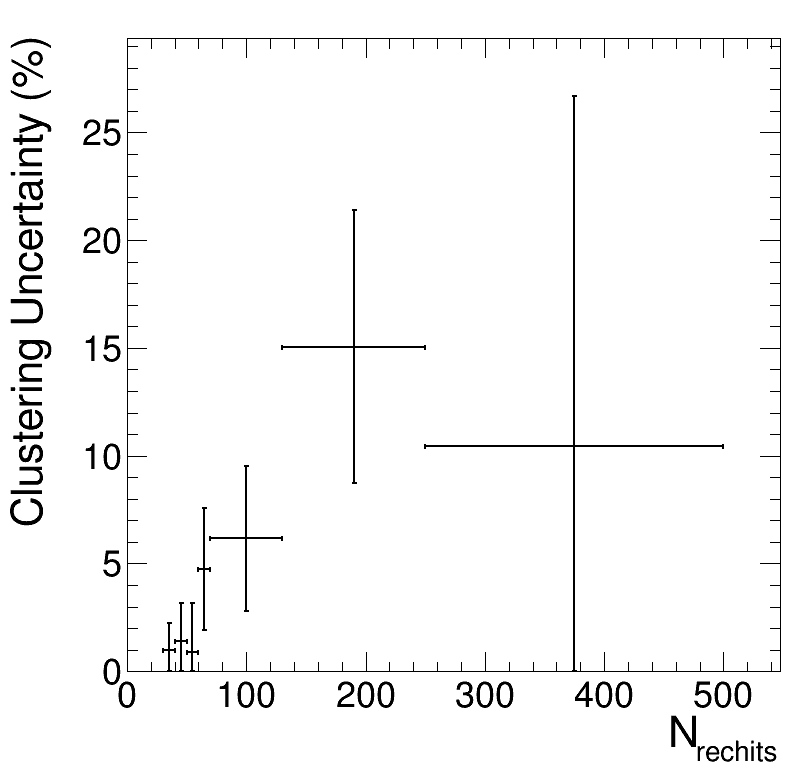

In [39]:

c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
hm = {}
hb = {}


cluster_unc_hist = create_TH1D(np.array([1]), 'hm1', axis_title = ['N_{rechits}','Cluster Efficiency Uncertainty (%)'], binning=nRechits+[500])
id_unc_hist = create_TH1D(np.array([1]), 'hm1', axis_title = ['N_{rechits}','Cluster ID Uncertainty (%)'], binning=nRechits+[500])
total_unc_hist = create_TH1D(np.array([1]), 'hm1', axis_title = ['N_{rechits}','Total Uncertainty (%)'], binning=nRechits+[500])


for i in range(len(cluster_unc)):
    cluster_unc_hist.SetBinContent(i+1,cluster_unc[i])
    cluster_unc_hist.SetBinError(i+1,cluster_stat_unc[i])
    id_unc_hist.SetBinContent(i+1,id_unc[i])
    id_unc_hist.SetBinError(i+1,id_stat_unc[i])
    total_unc_hist.SetBinContent(i+1,total_unc[i])
    total_unc_hist.SetBinError(i+1,total_stat_unc[i])

cluster_unc_hist = rt.TGraphAsymmErrors(cluster_unc_hist) 
id_unc_hist = rt.TGraphAsymmErrors(id_unc_hist) 
total_unc_hist = rt.TGraphAsymmErrors(total_unc_hist) 
cluster_unc_hist.SetTitle(";N_{rechits};Clustering Uncertainty (%)");
id_unc_hist.SetTitle(";N_{rechits};Cluster ID Uncertainty (%)");
total_unc_hist.SetTitle(";N_{rechits};Total Uncertainty (%)");

# set the lower end of y-uncertainty to 0, if it becomes negative
for i in range(len(cluster_unc)):
    if cluster_unc[i] < cluster_stat_unc[i]:cluster_unc_hist.SetPointEYlow(i,cluster_unc[i])
    if id_unc[i] < id_stat_unc[i]:id_unc_hist.SetPointEYlow(i,id_unc[i])
    if total_unc[i] < total_stat_unc[i]:total_unc_hist.SetPointEYlow(i,total_unc[i])


# leg.Draw()
cluster_unc_hist.Draw('AP')
# id_unc_hist.Draw('AP')
# total_unc_hist.Draw('AP')
c.Draw()
# c.SaveAs(dir_name+names[j]+".png")
# c.SaveAs(dir_name+names[j]+".C")

# if j == 1: hm['mc_signal'].SetMaximum(6*max(hm['dy'].GetMaximum(),hm['mc_signal'].GetMaximum() ))
# else: hm['mc_signal'].SetMaximum(2*max(hm['dy'].GetMaximum(),hm['mc_signal'].GetMaximum() ))


# c.SetLogy()
# c.Draw()
